In [ ]:
# === INSTALL LIBRARIES ===
%pip install pandas matplotlib seaborn scikit-learn imbalanced-learn ipywidgets


=== INFORMASI DATASET ===
Jumlah baris: 50000
Jumlah kolom: 7
Kolom: ['Habitat', 'Ukuran', 'Perlindungan', 'Populasi', 'Tipe_Spesies', 'Lokasi', 'Status_Konservasi']

Sample data:
    Habitat  Ukuran      Perlindungan Populasi Tipe_Spesies    Lokasi  \
0  Perairan  Sedang        Dilindungi   Sedang        Flora     Medan   
1     Hutan  Sedang        Dilindungi   Tinggi        Fauna  Makassar   
2  Perairan   Besar        Dilindungi   Rendah        Flora  Surabaya   
3  Perairan  Sedang        Dilindungi   Sedang        Flora  Makassar   
4     Hutan   Kecil  Tidak Dilindungi   Tinggi        Flora  Makassar   

  Status_Konservasi  
0              Aman  
1              Aman  
2              Aman  
3              Aman  
4      Hampir Punah  

=== DISTRIBUSI TARGET (STATUS KONSERVASI) ===
Status_Konservasi
Hampir Punah    21500
Aman            17900
Terancam        10600
Name: count, dtype: int64

=== DISTRIBUSI KELAS SEBELUM SMOTE ===
Training set:
Status_Konservasi_encoded
0    14320


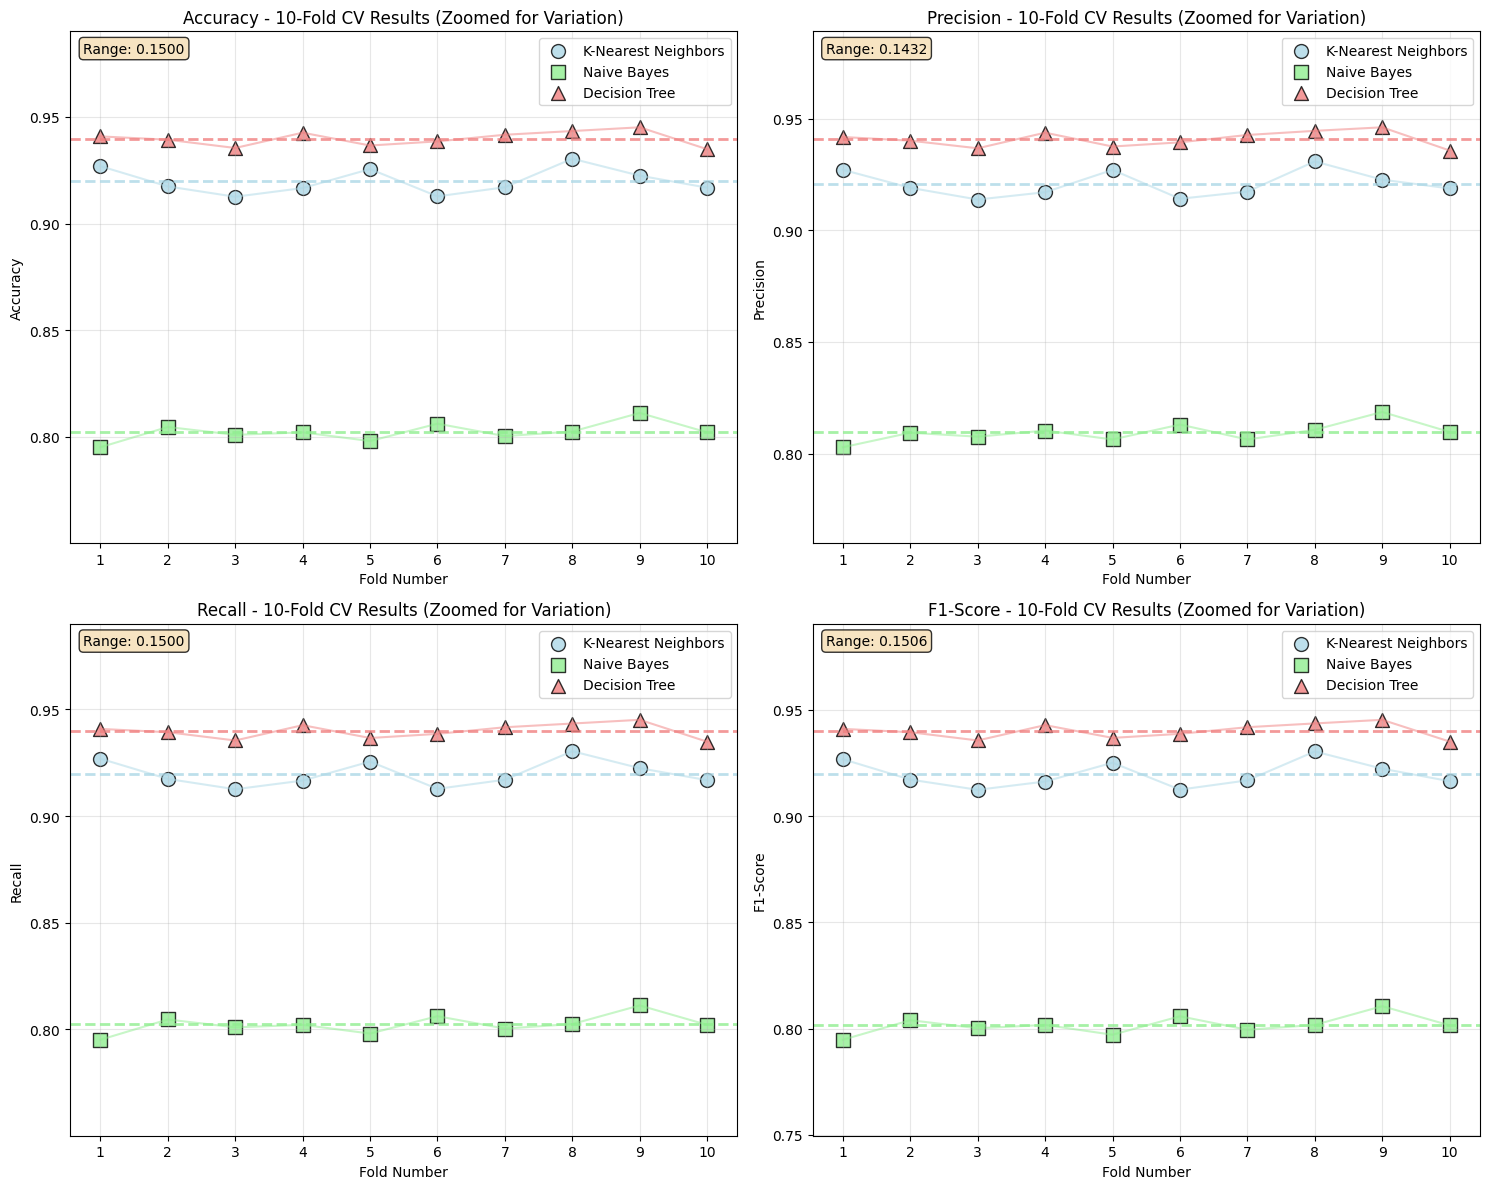


=== TRAINING FINAL MODELS & EVALUASI PADA TEST SET ===

=== K-NEAREST NEIGHBORS ===
Test Set Results:
Accuracy   : 0.9282
Precision  : 0.9217
Recall     : 0.9213
F1-Score   : 0.9214

Classification Report:
              precision    recall  f1-score   support

        Aman       0.91      0.94      0.92      3580
Hampir Punah       0.96      0.94      0.95      4300
    Terancam       0.89      0.88      0.89      2120

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000


=== NAIVE BAYES ===
Test Set Results:
Accuracy   : 0.7908
Precision  : 0.7843
Recall     : 0.8038
F1-Score   : 0.7811

Classification Report:
              precision    recall  f1-score   support

        Aman       0.87      0.87      0.87      3580
Hampir Punah       0.91      0.70      0.79      4300
    Terancam       0.58      0.84      0.68      2120

    accuracy                           0.79     100

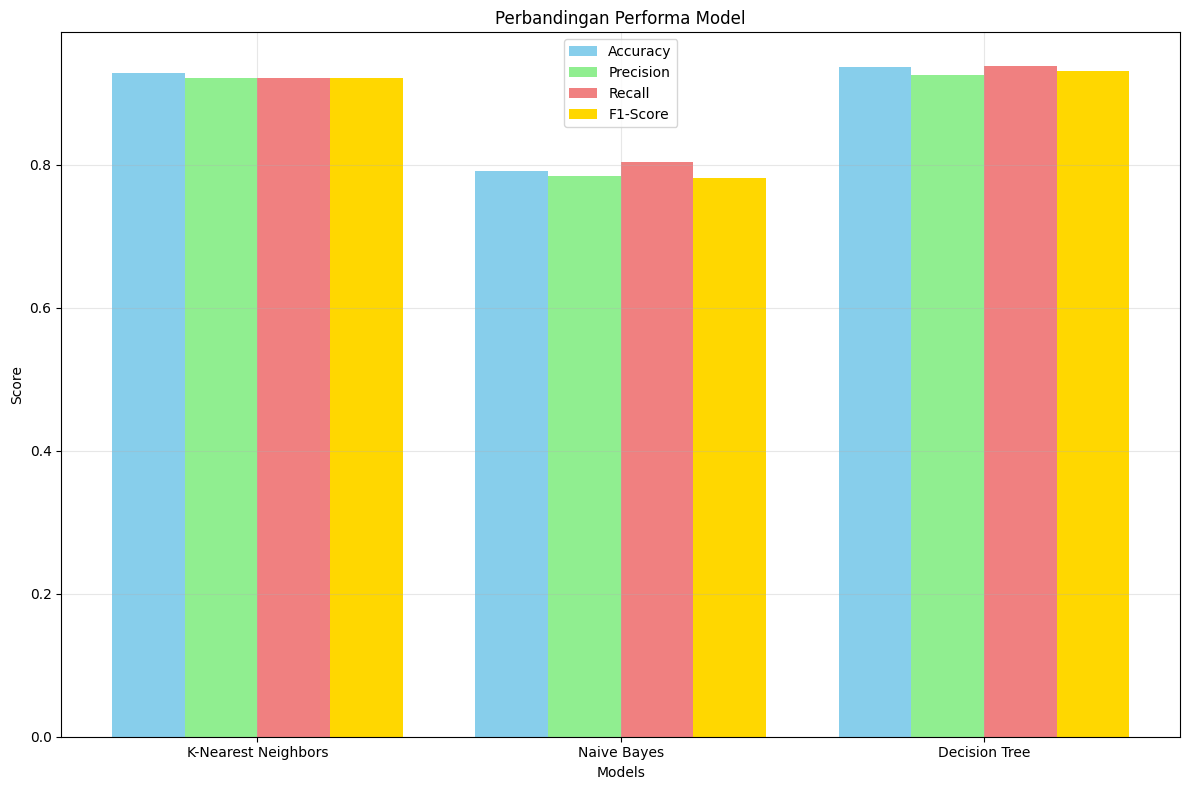


=== CONFUSION MATRIX ===


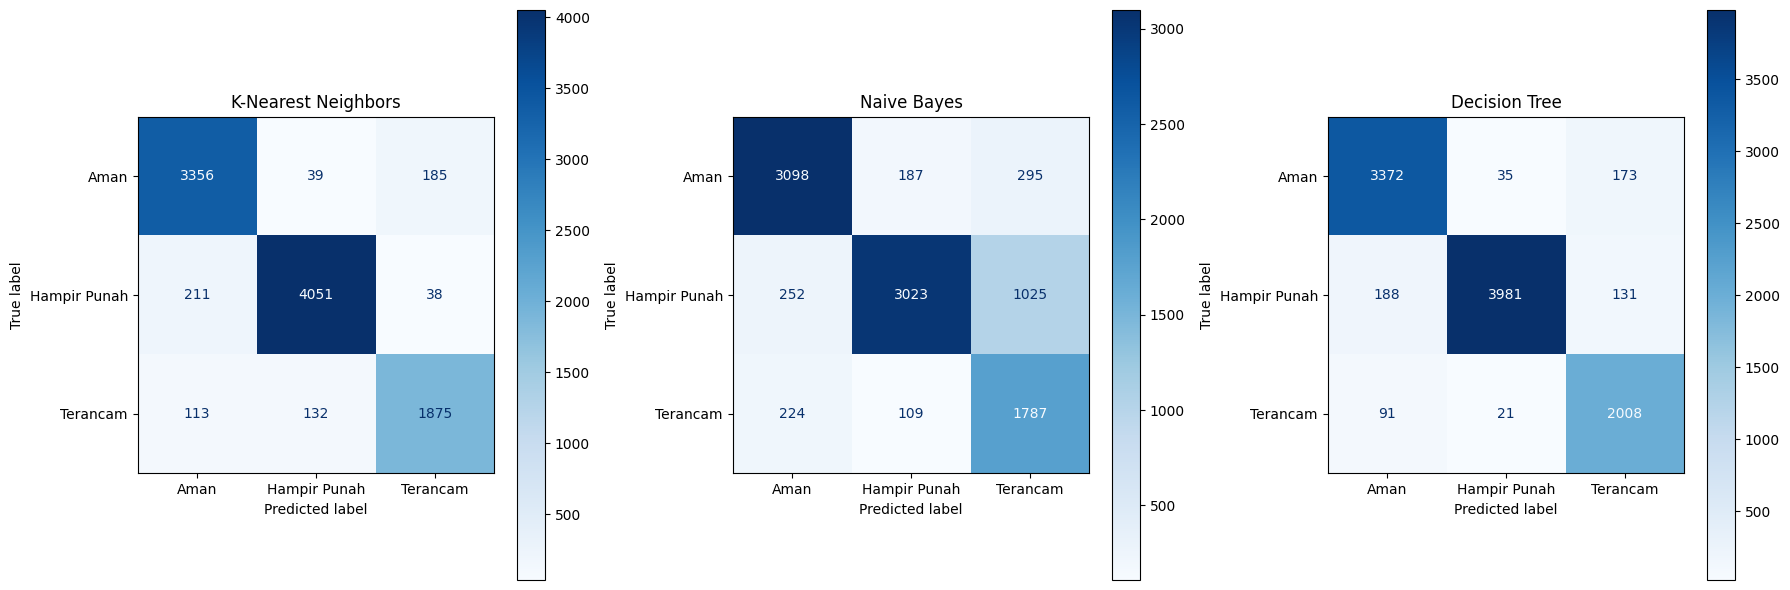


>>> MODEL TERBAIK BERDASARKAN F1-SCORE: Decision Tree
>>> F1-Score: 0.9313

=== RINGKASAN CROSS VALIDATION ===
                 Model  CV_Accuracy_Mean  CV_Accuracy_Std  CV_F1_Mean  \
0  K-Nearest Neighbors            0.9199           0.0058      0.9196   
1          Naive Bayes            0.8023           0.0042      0.8017   
2        Decision Tree            0.9399           0.0033      0.9400   

   CV_F1_Std  Test_Accuracy  Test_F1  
0     0.0059         0.9282   0.9214  
1     0.0042         0.7908   0.7811  
2     0.0033         0.9361   0.9313  

=== VISUALISASI TABEL PERFORMA MODEL ===


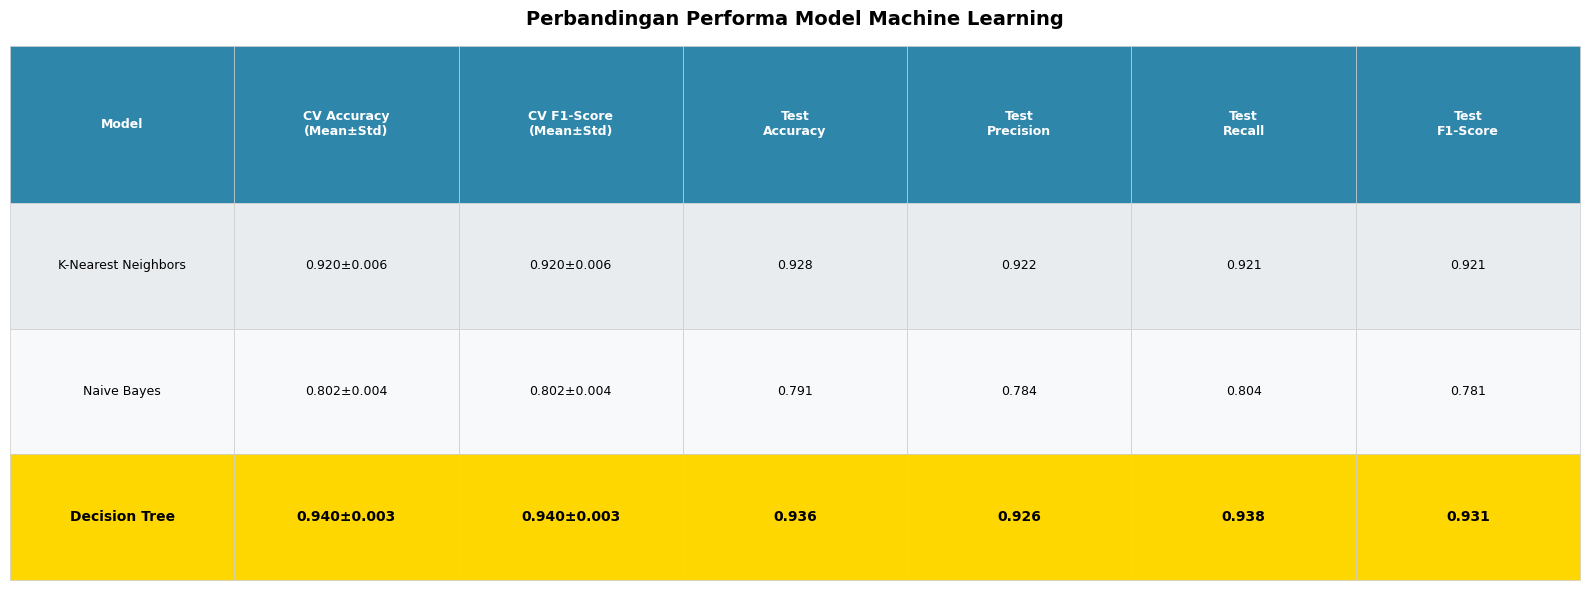


=== TABEL PERBANDINGAN NUMERIK DETAIL ===
                 Model CV_Accuracy_Mean CV_Accuracy_Std CV_Precision_Mean  \
0  K-Nearest Neighbors           0.9199          0.0058            0.9207   
1          Naive Bayes           0.8023          0.0042            0.8095   
2        Decision Tree           0.9399          0.0033            0.9408   

  CV_Recall_Mean CV_F1_Mean Test_Accuracy Test_Precision Test_Recall Test_F1  
0         0.9199     0.9196        0.9282         0.9217      0.9213  0.9214  
1         0.8023     0.8017        0.7908         0.7843      0.8038  0.7811  
2         0.9399     0.9400        0.9361         0.9261      0.9383  0.9313  

=== RANKING MODEL BERDASARKAN METRIK ===
Ranking Model berdasarkan Test F1-Score:
   Rank                Model  Test_F1  Test_Accuracy   CV_F1  CV_Accuracy
2     1        Decision Tree   0.9313         0.9361  0.9400       0.9399
0     2  K-Nearest Neighbors   0.9214         0.9282  0.9196       0.9199
1     3          Naive Baye

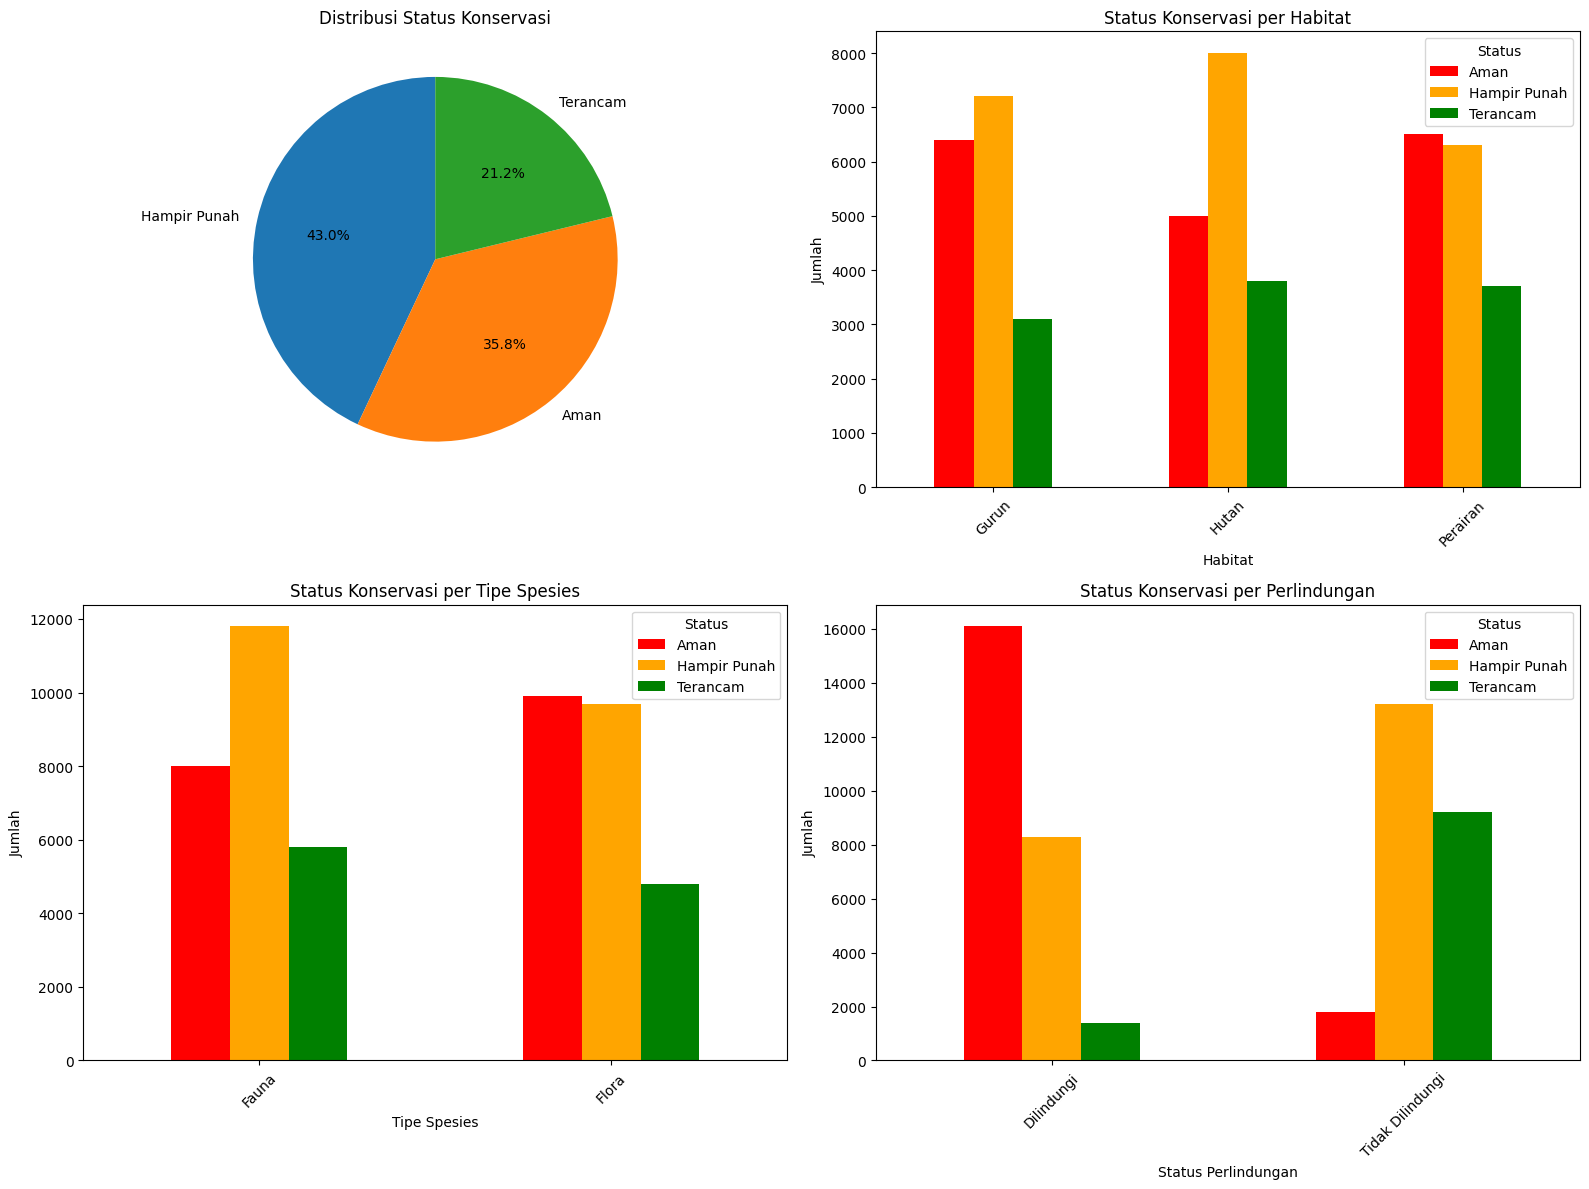


=== RINGKASAN BERDASARKAN LOKASI ===
Status_Konservasi  Aman  Hampir Punah  Terancam
Lokasi                                         
Bandung            2900          4500      2100
Jakarta            3900          4900      2100
Makassar           3600          4000      1700
Medan              4200          4500      2500
Surabaya           3300          3600      2200


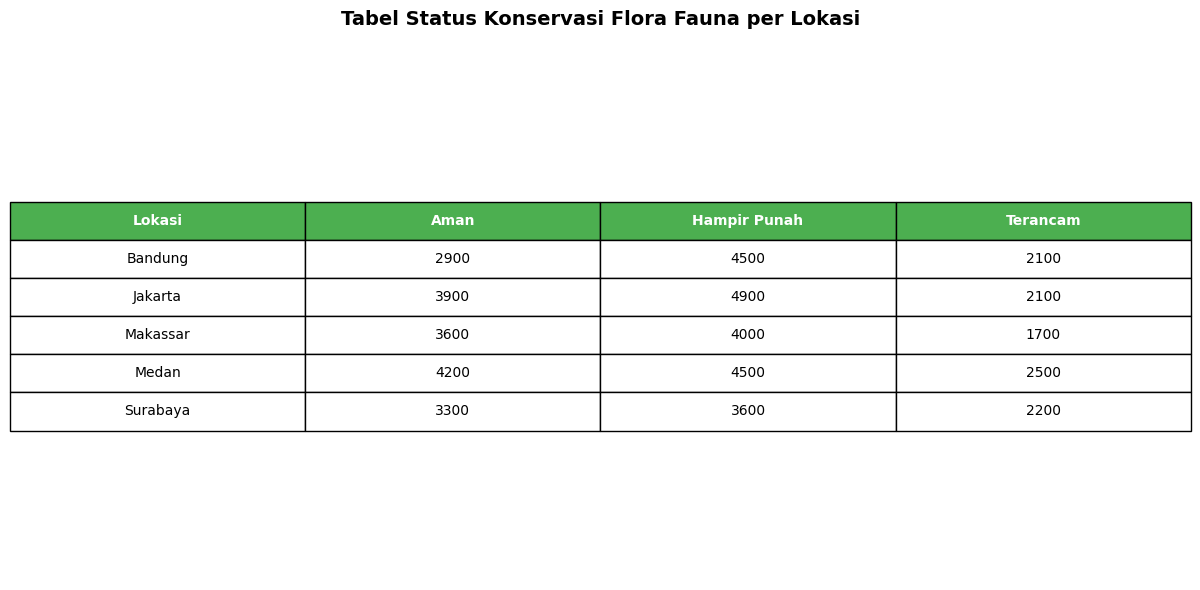


=== FEATURE IMPORTANCE (DECISION TREE) ===
                Feature  Importance
3      Populasi_encoded    0.497523
2  Perlindungan_encoded    0.228920
5        Lokasi_encoded    0.104589
1        Ukuran_encoded    0.070331
0       Habitat_encoded    0.063994
4  Tipe_Spesies_encoded    0.034642


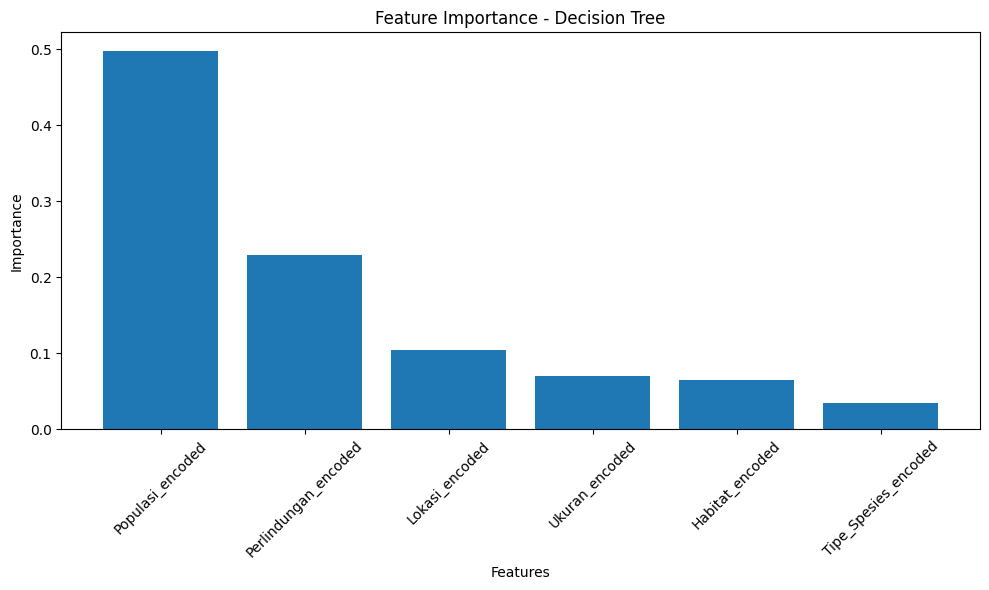


=== STRUKTUR DECISION TREE ===
Analisis aturan klasifikasi status konservasi flora fauna:
- Jika Perlindungan = Dilindungi dan Populasi = Tinggi → Status = Aman
- Jika Perlindungan = Tidak Dilindungi dan Populasi = Rendah → Status = Terancam/Hampir Punah
- Habitat dan Ukuran juga mempengaruhi prediksi status konservasi
|--- Perlindungan_encoded <= 0.50
|   |--- Populasi_encoded <= 0.50
|   |   |--- Habitat_encoded <= 1.50
|   |   |   |--- Ukuran_encoded <= 1.50
|   |   |   |   |--- Lokasi_encoded <= 2.50
|   |   |   |   |   |--- Lokasi_encoded <= 1.50
|   |   |   |   |   |   |--- Lokasi_encoded <= 0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Lokasi_encoded >  0.50
|   |   |   |   |   |   |   |--- Ukuran_encoded <= 0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Ukuran_encoded >  0.50
|   |   |   |   |   |   |   |   |--- Tipe_Spesies_encoded <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |

Button(button_style='info', description='Lihat Struktur Tree Lengkap', style=ButtonStyle())

Output()


KESIMPULAN ANALISIS
1. Model terbaik: Decision Tree
2. F1-Score terbaik: 0.9313
3. Accuracy terbaik: 0.9361
4. SMOTE berhasil menangani ketidakseimbangan kelas
5. 10-fold cross validation memberikan evaluasi yang robust

TABEL DISKUSI BERDASARKAN MODEL TERBAIK

Tabel Prediksi Flora dan Fauna:
Prediksi_Tipe_Status  Flora - Aman  Flora - Hampir Punah  Flora - Terancam  \
Ukuran Besar                  2100                  2700              2000   
Ukuran Sedang                 4500                  2400              1800   
Ukuran Kecil                  3300                  4000              1600   
Habitat Hutan                 3500                  3700              1300   
Habitat Gurun                 3000                  2700              1800   
Habitat Perairan              3400                  2700              2300   
Dilindungi                    9200                  3300               500   
Tidak Dilindungi               700                  5800              4900   
Pop

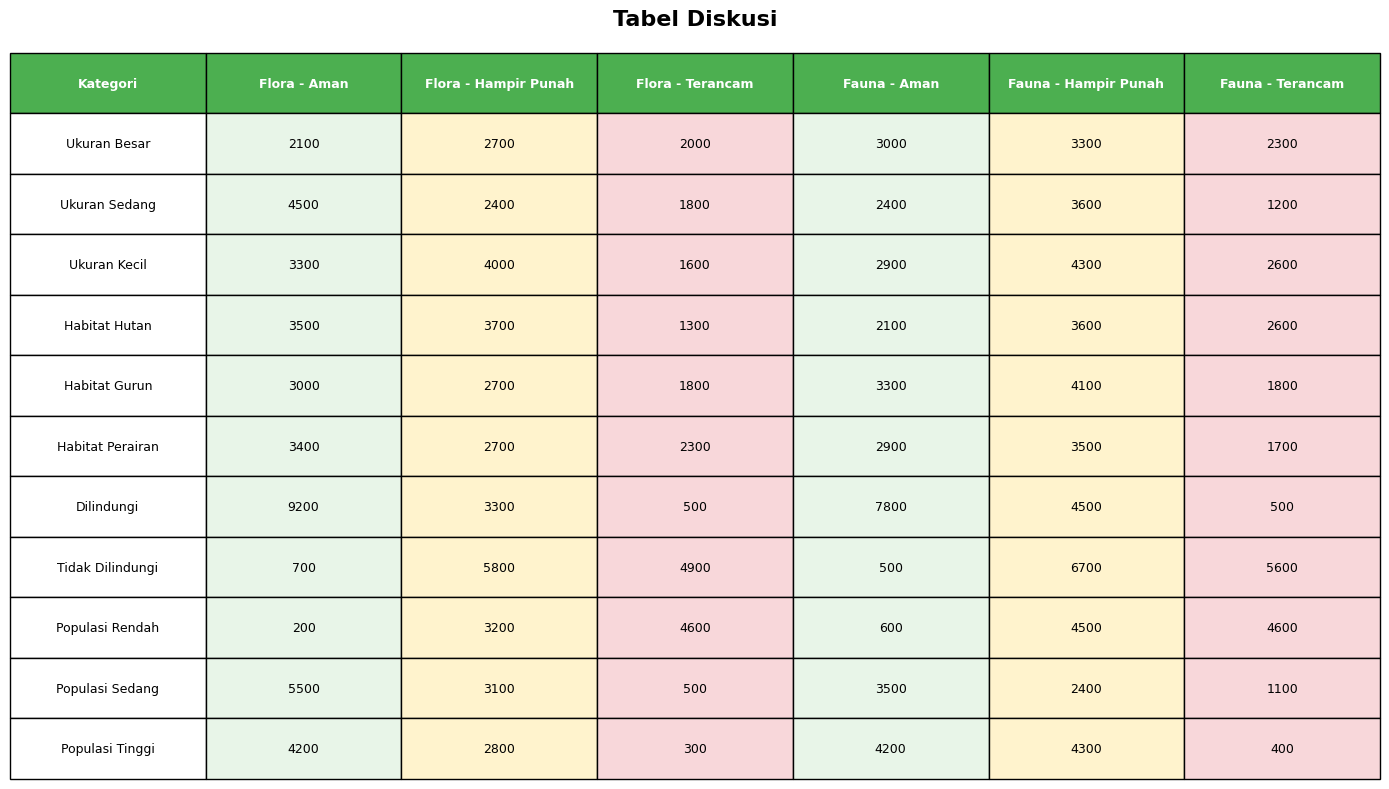


TABEL PREDIKSI: RANGE POPULASI TERHADAP STATUS KONSERVASI

Tabel Prediksi Berdasarkan Range Populasi:
              Aman  Hampir Punah  Terancam  Total Status_Dominan
0 - 1000       800          7700      9200  17700       Terancam
1001 - 2000   4409          2693       799   7901           Aman
2001 - 3000   4591          2807       801   8199           Aman
3001 - 4000   4205          3517       376   8098           Aman
4001 - >5000  4195          3583       324   8102           Aman

=== BREAKDOWN BERDASARKAN TIPE SPESIES ===

FLORA:
              Aman  Hampir Punah  Terancam  Total
0 - 1000       200          3200      4600   8000
1001 - 2000   2738          1482       250   4470
2001 - 3000   2762          1618       250   4630
3001 - 4000   2065          1377       159   3601
4001 - >5000  2135          1423       141   3699

FAUNA:
              Aman  Hampir Punah  Terancam  Total
0 - 1000       600          4500      4600   9700
1001 - 2000   1671          1211       549   34

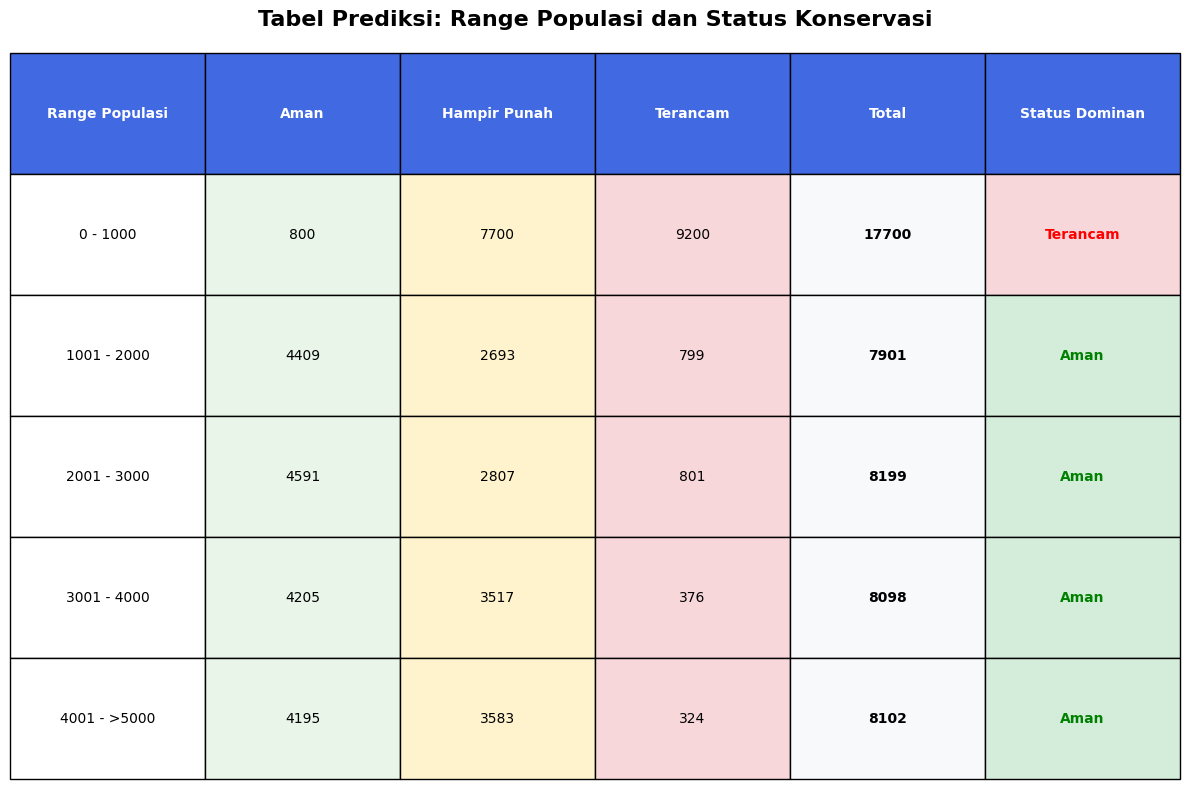


=== VISUALISASI HEATMAP RANGE POPULASI vs STATUS KONSERVASI ===


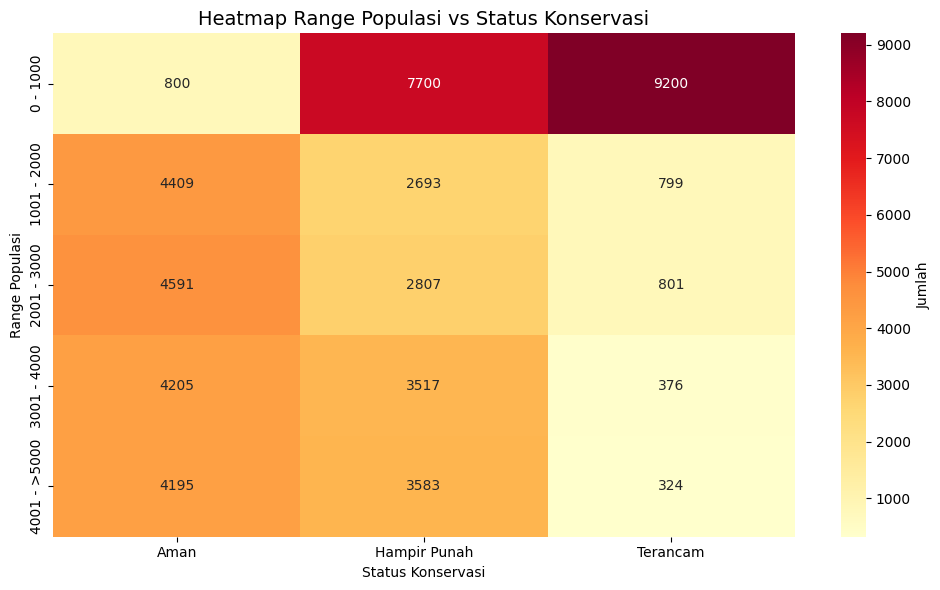


=== RINGKASAN ANALISIS RANGE POPULASI ===
Berdasarkan prediksi model terbaik:
• Range 0 - 1000: 17700 individu, Status dominan: Terancam (52.0%)
• Range 1001 - 2000: 7901 individu, Status dominan: Aman (55.8%)
• Range 2001 - 3000: 8199 individu, Status dominan: Aman (56.0%)
• Range 3001 - 4000: 8098 individu, Status dominan: Aman (51.9%)
• Range 4001 - >5000: 8102 individu, Status dominan: Aman (51.8%)


In [ ]:
# ===============================================================================
# PROGRAM ANALISIS KLASIFIKASI STATUS KONSERVASI FLORA DAN FAUNA
# ===============================================================================
# Deskripsi: Program ini melakukan analisis klasifikasi untuk memprediksi status
#            konservasi flora dan fauna menggunakan 3 algoritma machine learning:
#            K-Nearest Neighbors (KNN), Naive Bayes, dan Decision Tree
# Author: Kelompok 1 -  Data Warehouse 2025 - Semester 4 - Universitas Mercu Buana
#         Anggota:
#         - (41823010006) Aristo Baadi
#         - (41823010029) Fairuz Zaki
#         - (41823010129) Muhammad Bintang Saputra
# Dataset: https://drive.google.com/file/d/1yjQ7m3rJZE7D8xDmUrJdhiI2VVq4i0h-/view?usp=sharing
# ===============================================================================

# === IMPORT LIBRARY ===
# Library untuk manipulasi data dan analisis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')  # Menyembunyikan warning yang tidak perlu

# Library untuk machine learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    classification_report, accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)

# Library untuk menangani imbalanced dataset
from imblearn.over_sampling import SMOTE

# Library untuk tampilan interaktif
from IPython.display import display
import ipywidgets as widgets

# === LOAD DATASET ===
# Membaca dataset dari file CSV
df = pd.read_csv("dataset_50000.csv") # Nama file disesuaikan

# === EXPLORASI DATA ===
# Menampilkan informasi dasar tentang dataset
print("\n=== INFORMASI DATASET ===")
print(f"Jumlah baris: {df.shape[0]}")  # Total jumlah record
print(f"Jumlah kolom: {df.shape[1]}")  # Total jumlah kolom/fitur
print(f"Kolom: {list(df.columns)}")    # Nama-nama kolom
print("\nSample data:")
print(df.head())  # Menampilkan 5 baris pertama

# Menampilkan distribusi target (Status Konservasi)
print("\n=== DISTRIBUSI TARGET (STATUS KONSERVASI) ===")
print(df['Status_Konservasi'].value_counts())

# === ENCODING KATEGORI ===
# Mengkonversi data kategorikal menjadi numerik menggunakan LabelEncoder
# Ini diperlukan karena algoritma machine learning membutuhkan input numerik

# Inisialisasi LabelEncoder untuk setiap kolom kategorikal
le_habitat = LabelEncoder()
le_ukuran = LabelEncoder()
le_perlindungan = LabelEncoder()
le_populasi = LabelEncoder()
le_tipe_spesies = LabelEncoder()
le_lokasi = LabelEncoder()
le_status = LabelEncoder()

# Melakukan encoding pada setiap kolom kategorikal
df['Habitat_encoded'] = le_habitat.fit_transform(df['Habitat'])
df['Ukuran_encoded'] = le_ukuran.fit_transform(df['Ukuran'])
df['Perlindungan_encoded'] = le_perlindungan.fit_transform(df['Perlindungan'])
df['Populasi_encoded'] = le_populasi.fit_transform(df['Populasi'])
df['Tipe_Spesies_encoded'] = le_tipe_spesies.fit_transform(df['Tipe_Spesies'])
df['Lokasi_encoded'] = le_lokasi.fit_transform(df['Lokasi'])
df['Status_Konservasi_encoded'] = le_status.fit_transform(df['Status_Konservasi'])

# === FITUR & TARGET ===
# Memisahkan fitur (X) dan target (y) untuk model machine learning
X = df[['Habitat_encoded', 'Ukuran_encoded', 'Perlindungan_encoded', 
        'Populasi_encoded', 'Tipe_Spesies_encoded', 'Lokasi_encoded']]
y = df['Status_Konservasi_encoded']

# === SPLIT DATA ===
# Membagi data menjadi training set (80%) dan test set (20%)
# stratify=y memastikan distribusi kelas yang seimbang di kedua set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Menampilkan distribusi kelas sebelum SMOTE
print(f"\n=== DISTRIBUSI KELAS SEBELUM SMOTE ===")
print("Training set:")
print(pd.Series(y_train).value_counts().sort_index())
print("Test set:")
print(pd.Series(y_test).value_counts().sort_index())

# === APPLY SMOTE ===
# SMOTE (Synthetic Minority Oversampling Technique) digunakan untuk menangani
# ketidakseimbangan kelas dengan membuat sampel sintetis untuk kelas minoritas
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Menampilkan distribusi kelas setelah SMOTE
print(f"\n=== DISTRIBUSI KELAS SETELAH SMOTE ===")
print("Training set (after SMOTE):")
print(pd.Series(y_train_smote).value_counts().sort_index())

# === INISIALISASI MODEL ===
# Menginisialisasi 3 model machine learning yang akan dibandingkan
print("\n=== INISIALISASI 3 MODEL ===")
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),  # KNN dengan 5 tetangga
    'Naive Bayes': GaussianNB(),                                 # Gaussian Naive Bayes
    'Decision Tree': DecisionTreeClassifier(random_state=42)     # Decision Tree
}

# === 10-FOLD CROSS VALIDATION ===
# Melakukan 10-fold cross validation untuk evaluasi model yang robust
print("\n=== 10-FOLD CROSS VALIDATION ===")
cv_results = {}
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Evaluasi setiap model dengan cross validation
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")
    
    # Menghitung berbagai metrik dengan cross validation
    cv_scores = cross_val_score(model, X_train_smote, y_train_smote, cv=kfold, scoring='accuracy')
    cv_precision = cross_val_score(model, X_train_smote, y_train_smote, cv=kfold, scoring='precision_macro')
    cv_recall = cross_val_score(model, X_train_smote, y_train_smote, cv=kfold, scoring='recall_macro')
    cv_f1 = cross_val_score(model, X_train_smote, y_train_smote, cv=kfold, scoring='f1_macro')
    
    # Menyimpan hasil cross validation
    cv_results[model_name] = {
        'accuracy': cv_scores,
        'precision': cv_precision,
        'recall': cv_recall,
        'f1': cv_f1
    }
    
    # Menampilkan hasil dengan mean dan standar deviasi
    print(f"Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print(f"Precision: {cv_precision.mean():.4f} (+/- {cv_precision.std() * 2:.4f})")
    print(f"Recall: {cv_recall.mean():.4f} (+/- {cv_recall.std() * 2:.4f})")
    print(f"F1-Score: {cv_f1.mean():.4f} (+/- {cv_f1.std() * 2:.4f})")

# === VISUALISASI HASIL CROSS VALIDATION ===
# Membuat scatter plot untuk membandingkan performa model secara visual
print("\n=== VISUALISASI HASIL CROSS VALIDATION ===")
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
metrics = ['accuracy', 'precision', 'recall', 'f1']
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

for i, (metric, metric_name) in enumerate(zip(metrics, metric_names)):
    ax = axes[i//2, i%2]
    
    # Mempersiapkan data untuk scatter plot
    colors = ['lightblue', 'lightgreen', 'lightcoral']
    markers = ['o', 's', '^']
    
    # Menentukan range y-axis untuk menampilkan variasi dengan lebih jelas
    all_scores = []
    for model_name in models.keys():
        all_scores.extend(cv_results[model_name][metric])
    
    min_score = min(all_scores)
    max_score = max(all_scores)
    score_range = max_score - min_score
    
    # Memperluas range untuk menampilkan "wave" variasi
    y_min = max(0, min_score - score_range * 0.3)
    y_max = min(1, max_score + score_range * 0.3)
    
    # Membuat scatter plot untuk setiap model
    for j, model_name in enumerate(models.keys()):
        scores = cv_results[model_name][metric]
        fold_numbers = np.arange(1, len(scores) + 1)
        
        # Scatter plot untuk setiap fold
        ax.scatter(fold_numbers, scores, 
                  color=colors[j], 
                  marker=markers[j], 
                  s=100, 
                  alpha=0.8, 
                  label=model_name,
                  edgecolors='black',
                  linewidth=1)
        
        # Menambahkan garis trend (rata-rata) dengan garis putus-putus
        mean_score = scores.mean()
        ax.axhline(y=mean_score, color=colors[j], linestyle='--', alpha=0.8, linewidth=2)
        
        # Menambahkan garis penghubung untuk menunjukkan variasi
        ax.plot(fold_numbers, scores, color=colors[j], alpha=0.5, linewidth=1.5, linestyle='-')
    
    # Pengaturan tampilan dengan range y-axis yang disesuaikan
    ax.set_title(f'{metric_name} - 10-Fold CV Results (Zoomed for Variation)')
    ax.set_xlabel('Fold Number')
    ax.set_ylabel(metric_name)
    ax.set_xticks(range(1, 11))
    ax.legend(loc='best')
    ax.grid(True, alpha=0.3)
    
    # Mengatur y-axis untuk menampilkan variasi dengan lebih jelas
    ax.set_ylim(y_min, y_max)
    
    # Menambahkan informasi statistik pada plot
    ax.text(0.02, 0.98, f'Range: {score_range:.4f}', transform=ax.transAxes, 
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# === TRAINING FINAL MODELS ===
# Melatih model final dan evaluasi pada test set
print("\n=== TRAINING FINAL MODELS & EVALUASI PADA TEST SET ===")
final_results = {}

for model_name, model in models.items():
    print(f"\n=== {model_name.upper()} ===")
    
    # Melatih model dengan data SMOTE
    model.fit(X_train_smote, y_train_smote)
    
    # Prediksi pada test set
    y_pred = model.predict(X_test)
    
    # Menghitung metrik evaluasi
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    
    # Menyimpan hasil
    final_results[model_name] = {
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1,
        'predictions': y_pred
    }
    
    # Menampilkan hasil evaluasi
    print(f"Test Set Results:")
    print(f"Accuracy   : {acc:.4f}")
    print(f"Precision  : {prec:.4f}")
    print(f"Recall     : {rec:.4f}")
    print(f"F1-Score   : {f1:.4f}")
    
    # Menampilkan classification report detail
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le_status.classes_, zero_division=0))

# === PERBANDINGAN HASIL MODEL ===
# Membuat tabel perbandingan performa semua model
print("\n=== PERBANDINGAN HASIL SEMUA MODEL ===")
comparison_df = pd.DataFrame({
    'Model': list(final_results.keys()),
    'Accuracy': [final_results[model]['accuracy'] for model in final_results.keys()],
    'Precision': [final_results[model]['precision'] for model in final_results.keys()],
    'Recall': [final_results[model]['recall'] for model in final_results.keys()],
    'F1-Score': [final_results[model]['f1'] for model in final_results.keys()]
})

print(comparison_df.round(4))

# === VISUALISASI PERBANDINGAN MODEL ===
# Membuat bar chart untuk perbandingan visual performa model
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(comparison_df))
width = 0.2

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold']

# Membuat bar chart untuk setiap metrik
for i, (metric, color) in enumerate(zip(metrics, colors)):
    ax.bar(x + i*width, comparison_df[metric], width, label=metric, color=color)

# Pengaturan tampilan chart
ax.set_xlabel('Models')
ax.set_ylabel('Score')
ax.set_title('Perbandingan Performa Model')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(comparison_df['Model'])
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# === CONFUSION MATRIX ===
# Menampilkan confusion matrix untuk setiap model
print("\n=== CONFUSION MATRIX ===")
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, (model_name, model) in enumerate(models.items()):
    y_pred = final_results[model_name]['predictions']
    # Membuat confusion matrix display
    ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred, 
        display_labels=le_status.classes_, 
        cmap='Blues', 
        ax=axes[i]
    )
    axes[i].set_title(f"{model_name}")

plt.tight_layout()
plt.show()

# === MENENTUKAN MODEL TERBAIK ===
# Memilih model terbaik berdasarkan F1-Score
best_model_name = max(final_results.keys(), key=lambda x: final_results[x]['f1'])
best_model = models[best_model_name]

print(f"\n>>> MODEL TERBAIK BERDASARKAN F1-SCORE: {best_model_name}")
print(f">>> F1-Score: {final_results[best_model_name]['f1']:.4f}")

# === CROSS VALIDATION SUMMARY TABLE ===
# Membuat ringkasan hasil cross validation
print("\n=== RINGKASAN CROSS VALIDATION ===")
cv_summary = pd.DataFrame({
    'Model': list(models.keys()),
    'CV_Accuracy_Mean': [cv_results[model]['accuracy'].mean() for model in models.keys()],
    'CV_Accuracy_Std': [cv_results[model]['accuracy'].std() for model in models.keys()],
    'CV_F1_Mean': [cv_results[model]['f1'].mean() for model in models.keys()],
    'CV_F1_Std': [cv_results[model]['f1'].std() for model in models.keys()],
    'Test_Accuracy': [final_results[model]['accuracy'] for model in models.keys()],
    'Test_F1': [final_results[model]['f1'] for model in models.keys()]
})

print(cv_summary.round(4))

# === VISUALISASI TABEL PERFORMA MODEL ===
# Membuat tabel visual performa model dengan angka aktual
print("\n=== VISUALISASI TABEL PERFORMA MODEL ===")
fig, ax = plt.subplots(figsize=(16, 6))
ax.axis('off')

# Mempersiapkan data untuk tabel visual
table_data = []
headers = ['Model', 'CV Accuracy\n(Mean±Std)', 'CV F1-Score\n(Mean±Std)', 'Test\nAccuracy', 'Test\nPrecision', 'Test\nRecall', 'Test\nF1-Score']
table_data.append(headers)

# Menambahkan data untuk setiap model
for model_name in models.keys():
    cv_acc_mean = cv_results[model_name]['accuracy'].mean()
    cv_acc_std = cv_results[model_name]['accuracy'].std()
    cv_f1_mean = cv_results[model_name]['f1'].mean()
    cv_f1_std = cv_results[model_name]['f1'].std()
    
    row = [
        model_name,
        f"{cv_acc_mean:.3f}±{cv_acc_std:.3f}",
        f"{cv_f1_mean:.3f}±{cv_f1_std:.3f}",
        f"{final_results[model_name]['accuracy']:.3f}",
        f"{final_results[model_name]['precision']:.3f}",
        f"{final_results[model_name]['recall']:.3f}",
        f"{final_results[model_name]['f1']:.3f}"
    ]
    table_data.append(row)

# Membuat tabel matplotlib
table = ax.table(
    cellText=table_data[1:],
    colLabels=table_data[0],
    cellLoc='center',
    loc='center',
    bbox=[0, 0, 1, 1]
)

# Styling tabel - lebih compact
table.auto_set_font_size(False)
table.set_fontsize(15)
table.scale(1.0, 1.8)

# Pewarnaan header dengan gradient
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
for i, header in enumerate(headers):
    table[(0, i)].set_facecolor('#2E86AB')
    table[(0, i)].set_text_props(weight='bold', color='white', size=9)
    table[(0, i)].set_height(0.15)

# Pewarnaan baris dengan highlight untuk model terbaik
best_model_index = list(models.keys()).index(best_model_name) + 1
for i in range(1, len(table_data)):
    for j in range(len(headers)):
        cell = table[(i, j)]
        cell.set_height(0.12)
        
        if i == best_model_index:
            # Highlight model terbaik dengan warna emas
            cell.set_facecolor('#FFD700')
            cell.set_text_props(weight='bold', size=10)
            # Tambahkan border tebal untuk model terbaik
            cell.set_edgecolor('#FF8C00')
            cell.set_linewidth(2)
        else:
            # Warna alternatif untuk baris lainnya
            if i % 2 == 0:
                cell.set_facecolor('#F8F9FA')
            else:
                cell.set_facecolor('#E9ECEF')
            cell.set_text_props(size=9)

# Menambahkan garis vertikal untuk pemisah kolom
for i in range(len(headers) + 1):
    for j in range(len(table_data)):
        if i < len(headers):
            table[(j, i)].set_edgecolor('#CCCCCC')
            table[(j, i)].set_linewidth(0.5)

plt.title("Perbandingan Performa Model Machine Learning", fontsize=14, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()

# === TABEL PERBANDINGAN NUMERIK DETAIL ===
# Membuat tabel numerik yang lebih detail
print("\n=== TABEL PERBANDINGAN NUMERIK DETAIL ===")
detailed_comparison = pd.DataFrame({
    'Model': list(models.keys()),
    'CV_Accuracy_Mean': [f"{cv_results[model]['accuracy'].mean():.4f}" for model in models.keys()],
    'CV_Accuracy_Std': [f"{cv_results[model]['accuracy'].std():.4f}" for model in models.keys()],
    'CV_Precision_Mean': [f"{cv_results[model]['precision'].mean():.4f}" for model in models.keys()],
    'CV_Recall_Mean': [f"{cv_results[model]['recall'].mean():.4f}" for model in models.keys()],
    'CV_F1_Mean': [f"{cv_results[model]['f1'].mean():.4f}" for model in models.keys()],
    'Test_Accuracy': [f"{final_results[model]['accuracy']:.4f}" for model in models.keys()],
    'Test_Precision': [f"{final_results[model]['precision']:.4f}" for model in models.keys()],
    'Test_Recall': [f"{final_results[model]['recall']:.4f}" for model in models.keys()],
    'Test_F1': [f"{final_results[model]['f1']:.4f}" for model in models.keys()]
})

print(detailed_comparison)

# === RANKING MODEL BERDASARKAN METRIK ===
print("\n=== RANKING MODEL BERDASARKAN METRIK ===")
ranking_data = []
for model_name in models.keys():
    ranking_data.append({
        'Model': model_name,
        'CV_Accuracy': cv_results[model_name]['accuracy'].mean(),
        'CV_F1': cv_results[model_name]['f1'].mean(),
        'Test_Accuracy': final_results[model_name]['accuracy'],
        'Test_F1': final_results[model_name]['f1']
    })

ranking_df = pd.DataFrame(ranking_data)

# Ranking berdasarkan Test F1-Score (metrik utama)
ranking_df_sorted = ranking_df.sort_values('Test_F1', ascending=False)
ranking_df_sorted['Rank'] = range(1, len(ranking_df_sorted) + 1)

print("Ranking Model berdasarkan Test F1-Score:")
print(ranking_df_sorted[['Rank', 'Model', 'Test_F1', 'Test_Accuracy', 'CV_F1', 'CV_Accuracy']].round(4))

# === ANALISIS FLORA FAUNA DENGAN MODEL TERBAIK ===
print("\n=== ANALISIS FLORA FAUNA DENGAN MODEL TERBAIK ===")

# Melakukan prediksi pada seluruh dataset menggunakan model terbaik
df['Predicted_Status'] = best_model.predict(X)
df['Predicted_Status_Label'] = le_status.inverse_transform(df['Predicted_Status'])

# === ANALISIS BERDASARKAN HABITAT DAN TIPE SPESIES ===
print("\n=== ANALISIS DISTRIBUSI STATUS KONSERVASI ===")

# Membuat pivot table untuk analisis distribusi
pivot_table = df.pivot_table(
    values='Status_Konservasi_encoded',
    index='Habitat',
    columns='Tipe_Spesies',
    aggfunc='count',
    fill_value=0
)

print("\nDistribusi berdasarkan Habitat dan Tipe Spesies:")
print(pivot_table)

# Tabel detail analisis status konservasi
analysis_table = df.groupby(['Habitat', 'Tipe_Spesies', 'Status_Konservasi']).size().unstack(fill_value=0)
print("\n=== TABEL DETAIL STATUS KONSERVASI ===")
print(analysis_table)

# === VISUALISASI DISTRIBUSI STATUS KONSERVASI ===
# Membuat 4 visualisasi untuk analisis mendalam
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Pie chart distribusi status konservasi
status_counts = df['Status_Konservasi'].value_counts()
axes[0,0].pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title("Distribusi Status Konservasi")

# 2. Bar chart status konservasi per habitat
habitat_status = df.groupby(['Habitat', 'Status_Konservasi']).size().unstack(fill_value=0)
habitat_status.plot(kind='bar', ax=axes[0,1], color=['red', 'orange', 'green'])
axes[0,1].set_title("Status Konservasi per Habitat")
axes[0,1].set_xlabel("Habitat")
axes[0,1].set_ylabel("Jumlah")
axes[0,1].legend(title="Status")
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Bar chart status konservasi per tipe spesies
tipe_status = df.groupby(['Tipe_Spesies', 'Status_Konservasi']).size().unstack(fill_value=0)
tipe_status.plot(kind='bar', ax=axes[1,0], color=['red', 'orange', 'green'])
axes[1,0].set_title("Status Konservasi per Tipe Spesies")
axes[1,0].set_xlabel("Tipe Spesies")
axes[1,0].set_ylabel("Jumlah")
axes[1,0].legend(title="Status")
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Bar chart status konservasi per perlindungan
perlindungan_status = df.groupby(['Perlindungan', 'Status_Konservasi']).size().unstack(fill_value=0)
perlindungan_status.plot(kind='bar', ax=axes[1,1], color=['red', 'orange', 'green'])
axes[1,1].set_title("Status Konservasi per Perlindungan")
axes[1,1].set_xlabel("Status Perlindungan")
axes[1,1].set_ylabel("Jumlah")
axes[1,1].legend(title="Status")
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# === TABEL RINGKASAN BERDASARKAN LOKASI ===
print("\n=== RINGKASAN BERDASARKAN LOKASI ===")
lokasi_summary = df.groupby(['Lokasi', 'Status_Konservasi']).size().unstack(fill_value=0)
print(lokasi_summary)

# === VISUALISASI TABEL LOKASI ===
# Membuat tabel visual untuk distribusi lokasi
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('off')

# Konversi dataframe ke format tabel
table_data = []
headers = ['Lokasi'] + list(lokasi_summary.columns)
table_data.append(headers)

for idx, row in lokasi_summary.iterrows():
    table_data.append([idx] + list(row.values))

# Membuat tabel matplotlib
table = ax.table(
    cellText=table_data[1:],
    colLabels=table_data[0],
    cellLoc='center',
    loc='center'
)

# Styling tabel
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 2)

# Pewarnaan header
for i in range(len(headers)):
    table[(0, i)].set_facecolor('#4CAF50')
    table[(0, i)].set_text_props(weight='bold', color='white')

plt.title("Tabel Status Konservasi Flora Fauna per Lokasi", fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# === FEATURE IMPORTANCE (JIKA DECISION TREE TERBAIK) ===
# Analisis feature importance jika Decision Tree adalah model terbaik
if best_model_name == "Decision Tree":
    print("\n=== FEATURE IMPORTANCE (DECISION TREE) ===")
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print(feature_importance)
    
    # Visualisasi Feature Importance
    plt.figure(figsize=(10, 6))
    plt.bar(feature_importance['Feature'], feature_importance['Importance'])
    plt.title('Feature Importance - Decision Tree')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # === TAMPILKAN STRUKTUR DECISION TREE ===
    # Menampilkan struktur pohon keputusan
    tree_text = export_text(best_model, feature_names=X.columns.tolist())
    preview = "\n".join(tree_text.split("\n")[:15]) + "\n[Struktur lengkap tersedia...]"

    # Widget interaktif untuk menampilkan struktur lengkap
    full_output = widgets.Output()
    def on_button_click(b):
        with full_output:
            full_output.clear_output()
            print(tree_text)

    button = widgets.Button(description="Lihat Struktur Tree Lengkap", button_style="info")
    button.on_click(on_button_click)

    print("\n=== STRUKTUR DECISION TREE ===")
    print("Analisis aturan klasifikasi status konservasi flora fauna:")
    print("- Jika Perlindungan = Dilindungi dan Populasi = Tinggi → Status = Aman")
    print("- Jika Perlindungan = Tidak Dilindungi dan Populasi = Rendah → Status = Terancam/Hampir Punah")
    print("- Habitat dan Ukuran juga mempengaruhi prediksi status konservasi")
    print(preview)
    display(button, full_output)

# === KESIMPULAN ===
print("\n" + "="*60)
print("KESIMPULAN ANALISIS")
print("="*60)
print(f"1. Model terbaik: {best_model_name}")
print(f"2. F1-Score terbaik: {final_results[best_model_name]['f1']:.4f}")
print(f"3. Accuracy terbaik: {final_results[best_model_name]['accuracy']:.4f}")
print(f"4. SMOTE berhasil menangani ketidakseimbangan kelas")
print(f"5. 10-fold cross validation memberikan evaluasi yang robust")
print("="*60)

# === TABEL DISKUSi ===
print("\n" + "="*60)
print("TABEL DISKUSI BERDASARKAN MODEL TERBAIK")
print("="*60)

# Memastikan kolom prediksi sudah ada
if 'Predicted_Status_Label' not in df.columns:
    df['Predicted_Status'] = best_model.predict(X)
    df['Predicted_Status_Label'] = le_status.inverse_transform(df['Predicted_Status'])

# Membuat kolom kombinasi untuk analisis
df['Prediksi_Tipe_Status'] = df['Tipe_Spesies'] + ' - ' + df['Predicted_Status_Label']

# === DEFINISI KATEGORI UNTUK ANALISIS ===
# Mendefinisikan kategori-kategori yang akan dianalisis
row_definitions = {
    'Ukuran': ['Besar', 'Sedang', 'Kecil'],
    'Habitat': ['Hutan', 'Gurun', 'Perairan'],
    'Perlindungan': ['Dilindungi', 'Tidak Dilindungi'],
    'Populasi': ['Rendah', 'Sedang', 'Tinggi']
}

# Kolom untuk tabel output (kombinasi tipe spesies dan status)
column_order = [
    'Flora - Aman', 'Flora - Hampir Punah', 'Flora - Terancam',
    'Fauna - Aman', 'Fauna - Hampir Punah', 'Fauna - Terancam'
]

# === PEMBUATAN TABEL PREDIKSI ===
table_data = []
index_labels = []

# Loop untuk setiap kategori dan nilainya
for feature, values in row_definitions.items():
    for value in values:
        # Membuat label baris yang informatif
        if feature == 'Ukuran':
            label = f"Ukuran {value}"
        elif feature == 'Habitat':
            label = f"Habitat {value}"
        elif feature == 'Populasi':
            label = f"Populasi {value}"
        else:  # Perlindungan
            label = value
        
        index_labels.append(label)
        
        # Filter data berdasarkan kategori
        filtered_df = df[df[feature] == value]
        
        # Hitung jumlah untuk setiap kombinasi tipe-status
        counts = filtered_df['Prediksi_Tipe_Status'].value_counts()
        table_data.append(counts)

# Membuat DataFrame hasil prediksi
prediction_summary_df = pd.DataFrame(table_data, index=index_labels)

# Mengatur kolom dan mengisi nilai kosong dengan 0
prediction_summary_df = prediction_summary_df.reindex(columns=column_order, fill_value=0)

print("\nTabel Prediksi Flora dan Fauna:")
print(prediction_summary_df)

# === VISUALISASI TABEL PREDIKSI ===
# Membuat visualisasi tabel yang menarik
fig, ax = plt.subplots(figsize=(14, 8))
ax.axis('off')

# Konversi dataframe ke format tabel untuk matplotlib
table_data_viz = []
headers = ['Kategori'] + column_order
table_data_viz.append(headers)

for idx, row in prediction_summary_df.iterrows():
    table_data_viz.append([idx] + row.values.tolist())

# Membuat tabel matplotlib
table = ax.table(
    cellText=table_data_viz[1:],
    colLabels=table_data_viz[0],
    cellLoc='center',
    loc='center',
    bbox=[0, 0, 1, 1]
)

# Styling tabel
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 1.8)

# Pewarnaan header
for i in range(len(headers)):
    table[(0, i)].set_facecolor('#4CAF50')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Pewarnaan sel berdasarkan status konservasi
for i in range(1, len(table_data_viz)):
    for j in range(1, len(headers)):
        col_name = headers[j]
        # Memberikan warna sesuai status konservasi
        if 'Aman' in col_name:
            table[(i, j)].set_facecolor('#e8f5e8')  # Hijau muda untuk aman
        elif 'Hampir Punah' in col_name:
            table[(i, j)].set_facecolor('#fff3cd')  # Kuning untuk hampir punah
        elif 'Terancam' in col_name:
            table[(i, j)].set_facecolor('#f8d7da')  # Merah muda untuk terancam

plt.title("Tabel Diskusi", fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# === ANALISIS RANGE POPULASI TERHADAP STATUS KONSERVASI ===
print("\n" + "="*60)
print("TABEL PREDIKSI: RANGE POPULASI TERHADAP STATUS KONSERVASI")
print("="*60)

# Simulasikan range populasi dengan nilai acak dalam range yang sesuai
np.random.seed(42)  # Set seed untuk reproduksibilitas
df['Populasi_Numerik'] = 0  # Default value

# Isi nilai populasi numerik berdasarkan kategori
rendah_mask = df['Populasi'] == 'Rendah'
sedang_mask = df['Populasi'] == 'Sedang'
tinggi_mask = df['Populasi'] == 'Tinggi'

# Populasi Rendah: 0-1000
df.loc[rendah_mask, 'Populasi_Numerik'] = np.random.randint(0, 1001, size=rendah_mask.sum())
# Populasi Sedang: 1001-3000
df.loc[sedang_mask, 'Populasi_Numerik'] = np.random.randint(1001, 3001, size=sedang_mask.sum())
# Populasi Tinggi: 3001-5000+
df.loc[tinggi_mask, 'Populasi_Numerik'] = np.random.randint(3001, 5001, size=tinggi_mask.sum())

# Mendefinisikan range populasi numerik untuk analisis
ranges = [
    ('0 - 1000', 0, 1001),
    ('1001 - 2000', 1001, 2001),
    ('2001 - 3000', 2001, 3001),
    ('3001 - 4000', 3001, 4001),
    ('4001 - >5000', 4001, 5001)
]

# Membuat kolom baru untuk range populasi
df['Range_Populasi'] = 'Tidak Terdefinisi'
for name, lower, upper in ranges:
    mask = (df['Populasi_Numerik'] >= lower) & (df['Populasi_Numerik'] < upper)
    df.loc[mask, 'Range_Populasi'] = name

# === PEMBUATAN TABEL PREDIKSI BERDASARKAN RANGE POPULASI ===
# Analisis hanya berdasarkan range populasi dan status konservasi
range_names = [name for name, _, _ in ranges]
status_values = df['Status_Konservasi'].unique()

# Dataframe untuk menyimpan hasil analisis
prediction_by_range_df = pd.DataFrame(index=range_names, columns=status_values)
prediction_by_range_df = prediction_by_range_df.fillna(0)

# Mengisi dataframe dengan hasil prediksi
for range_name in range_names:
    # Filter data berdasarkan range populasi
    subset = df[df['Range_Populasi'] == range_name]
    
    # Hitung jumlah untuk setiap status konservasi dalam subset ini
    if not subset.empty:
        status_counts = subset['Predicted_Status_Label'].value_counts()
        
        # Isi dataframe dengan hasil hitungan
        for status in status_counts.index:
            if status in prediction_by_range_df.columns:
                prediction_by_range_df.loc[range_name, status] = status_counts[status]

# Tambahkan kolom total dan persentase untuk analisis
prediction_by_range_df['Total'] = prediction_by_range_df.sum(axis=1)

# Hitung persentase untuk tiap status
for status in status_values:
    percentage_col = f"{status} (%)"
    prediction_by_range_df[percentage_col] = (prediction_by_range_df[status] / prediction_by_range_df['Total'] * 100).round(1)

# === MENENTUKAN STATUS DOMINAN UNTUK SETIAP RANGE ===
prediction_by_range_df['Status_Dominan'] = ''
for range_name in range_names:
    row = prediction_by_range_df.loc[range_name]
    max_count = 0
    max_status = ''
    
    # Cari status dengan jumlah terbanyak untuk range ini
    for status in status_values:
        count = row[status]
        if count > max_count:
            max_count = count
            max_status = status
    
    prediction_by_range_df.loc[range_name, 'Status_Dominan'] = max_status

# Tampilkan tabel utama (tanpa kolom persentase untuk clarity)
print("\nTabel Prediksi Berdasarkan Range Populasi:")
main_columns = list(status_values) + ['Total', 'Status_Dominan']
print(prediction_by_range_df[main_columns])

# === BREAKDOWN BERDASARKAN TIPE SPESIES ===
print("\n=== BREAKDOWN BERDASARKAN TIPE SPESIES ===")
for species_type in ['Flora', 'Fauna']:
    print(f"\n{species_type.upper()}:")
    species_df = pd.DataFrame(index=range_names, columns=status_values).fillna(0)
    
    for range_name in range_names:
        # Filter data berdasarkan range populasi dan tipe spesies
        subset = df[(df['Range_Populasi'] == range_name) & (df['Tipe_Spesies'] == species_type)]
        
        if not subset.empty:
            status_counts = subset['Predicted_Status_Label'].value_counts()
            for status in status_counts.index:
                if status in species_df.columns:
                    species_df.loc[range_name, status] = status_counts[status]
    
    # Tambahkan total
    species_df['Total'] = species_df.sum(axis=1)
    print(species_df[list(status_values) + ['Total']])

# === VISUALISASI TABEL PREDIKSI ===
# Membuat visualisasi tabel yang menarik
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('off')

# Konversi dataframe ke format tabel untuk matplotlib
table_data_viz = []
headers = ['Range Populasi'] + list(status_values) + ['Total', 'Status Dominan']
table_data_viz.append(headers)

for idx, row in prediction_by_range_df.iterrows():
    table_data_viz.append([idx] + [row[col] for col in main_columns])

# Membuat tabel matplotlib
table = ax.table(
    cellText=table_data_viz[1:],
    colLabels=table_data_viz[0],
    cellLoc='center',
    loc='center',
    bbox=[0, 0, 1, 1]
)

# Styling tabel
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.8)

# Pewarnaan header
for i in range(len(headers)):
    table[(0, i)].set_facecolor('#4169E1')  # Royal blue untuk header
    table[(0, i)].set_text_props(weight='bold', color='white')

# Pewarnaan sel berdasarkan status konservasi
for i in range(1, len(table_data_viz)):
    for j in range(1, len(headers)):
        col_name = headers[j]
        
        # Warna berdasarkan status konservasi
        if col_name == 'Aman':
            table[(i, j)].set_facecolor('#e8f5e8')  # Hijau muda
        elif col_name == 'Hampir Punah':
            table[(i, j)].set_facecolor('#fff3cd')  # Kuning
        elif col_name == 'Terancam':
            table[(i, j)].set_facecolor('#f8d7da')  # Merah muda
        elif col_name == 'Status Dominan':
            # Warna berdasarkan status dominan
            status_dominan = table_data_viz[i][j]
            if status_dominan == 'Aman':
                table[(i, j)].set_facecolor('#d4edda')  # Hijau
                table[(i, j)].set_text_props(weight='bold', color='green')
            elif status_dominan == 'Hampir Punah':
                table[(i, j)].set_facecolor('#fff3cd')  # Kuning
                table[(i, j)].set_text_props(weight='bold', color='orange')
            elif status_dominan == 'Terancam':
                table[(i, j)].set_facecolor('#f8d7da')  # Merah
                table[(i, j)].set_text_props(weight='bold', color='red')
        elif col_name == 'Total':
            table[(i, j)].set_facecolor('#f8f9fa')  # Abu-abu muda
            table[(i, j)].set_text_props(weight='bold')

plt.title("Tabel Prediksi: Range Populasi dan Status Konservasi", fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# === VISUALISASI HEATMAP RANGE POPULASI vs STATUS KONSERVASI ===
print("\n=== VISUALISASI HEATMAP RANGE POPULASI vs STATUS KONSERVASI ===")

# Menggunakan data yang sudah ada
heatmap_data = prediction_by_range_df[status_values].astype(int)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlOrRd", fmt="d", cbar_kws={'label': 'Jumlah'})
plt.title("Heatmap Range Populasi vs Status Konservasi", fontsize=14)
plt.xlabel("Status Konservasi")
plt.ylabel("Range Populasi")
plt.tight_layout()
plt.show()

# === RINGKASAN ANALISIS ===
print("\n=== RINGKASAN ANALISIS RANGE POPULASI ===")
print("Berdasarkan prediksi model terbaik:")
for range_name in range_names:
    row = prediction_by_range_df.loc[range_name]
    total = row['Total']
    status_dominan = row['Status_Dominan']
    
    if total > 0:
        pct_dominan = (row[status_dominan] / total * 100)
        print(f"• Range {range_name}: {int(total)} individu, Status dominan: {status_dominan} ({pct_dominan:.1f}%)")
    else:
        print(f"• Range {range_name}: Tidak ada data")
